<a href="https://colab.research.google.com/github/Emma-Cap/Deep-Learning-Project/blob/main/PROVAAAA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import zipfile
import os

# Specifica il percorso del file zip
zip_path = '/content/archive.zip'

# Specifica la directory dove vuoi estrarre il file zip
extract_path = '/content/dataset'

# Estrai il file zip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Visualizza il contenuto delle directory estratte
for root, dirs, files in os.walk(extract_path):
    print(f"In directory: {root}")
    print(f"Cartelle: {dirs}")
    print(f"File: {files}")
    print("-" * 50)


In directory: /content/dataset
Cartelle: ['faces_02', 'faces']
File: []
--------------------------------------------------
In directory: /content/dataset/faces_02
Cartelle: ['part3']
File: []
--------------------------------------------------
In directory: /content/dataset/faces_02/part3
Cartelle: []
File: ['50_0_0_20170120222217575.jpg', '26_0_3_20170119181310597.jpg', '100_1_0_20170119212053665.jpg', '26_1_3_20170119192124129.jpg', '40_1_3_20170119204008588.jpg', '23_1_3_20170119164546693.jpg', '20_1_0_20170119153405080.jpg', '30_0_3_20170119195740600.jpg', '48_0_0_20170117153924476.jpg', '48_0_3_20170119201811053.jpg', '44_0_3_20170119195247387.jpg', '48_0_0_20170120134009260.jpg', '24_0_3_20170119165416686.jpg', '63_0_3_20170119211952608.jpg', '31_0_1_20170117130014250.jpg', '4_0_3_20170119150403983.jpg', '45_0_3_20170119203815607.jpg', '24_1_1_20170115235433094.jpg', '45_0_4_20170117130551448.jpg', '55_0_3_20170119204546494.jpg', '50_0_3_20170119183204846.jpg', '55_0_0_20170120140

In [3]:
import os
from glob import glob

# Percorsi delle cartelle che contengono le immagini
faces_dir = '/content/dataset/faces/Train'
faces_02_dir = '/content/dataset/faces_02/part3'

# Leggi tutte le immagini nelle due cartelle
faces_images = glob(os.path.join(faces_dir, '*.jpg'))
faces_02_images = glob(os.path.join(faces_02_dir, '*.jpg'))

# Conta le immagini nelle singole cartelle
num_faces_images = len(faces_images)
num_faces_02_images = len(faces_02_images)

# Combina tutte le immagini in una lista
all_images = faces_images + faces_02_images

# Conta il numero totale di immagini combinate
total_images = len(all_images)

# Percorso del file annotazioni
annotations_file = '/content/dataset/faces/train.csv'

# Conta il numero di annotazioni (linee nel file CSV, escludendo l'intestazione)
with open(annotations_file, 'r') as f:
    num_annotations = len(f.readlines()) - 1  # Rimuovi l'intestazione

# Stampa i risultati
print(f"Numero di immagini in 'faces/Train': {num_faces_images}")
print(f"Numero di immagini in 'faces_02/part3': {num_faces_02_images}")
print(f"Numero totale di immagini combinate: {total_images}")
print(f"Numero di annotazioni nel file CSV: {num_annotations}")


Numero di immagini in 'faces/Train': 19906
Numero di immagini in 'faces_02/part3': 3250
Numero totale di immagini combinate: 23156
Numero di annotazioni nel file CSV: 19906


In [5]:
# Controlla i nomi delle colonne nel file CSV
annotations = pd.read_csv(annotations_file)
print(annotations.columns)


Index(['ID', 'Class'], dtype='object')


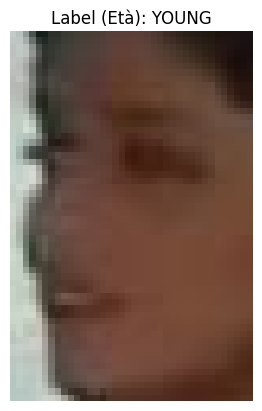

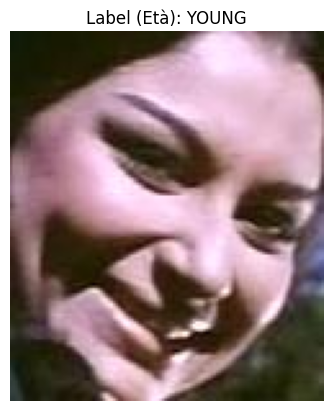

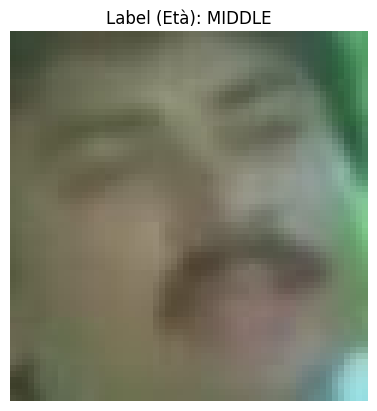

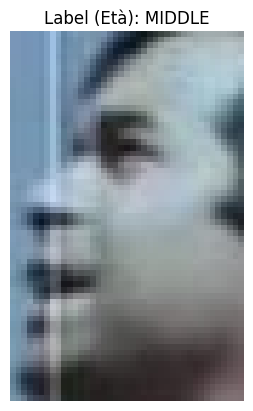

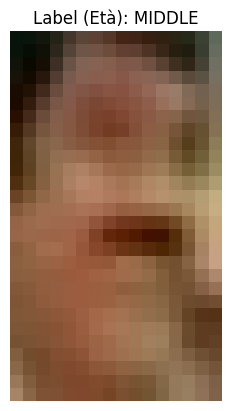

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from PIL import Image

# Percorso del file CSV e della cartella immagini
annotations_file = '/content/dataset/faces/train.csv'
images_dir = '/content/dataset/faces/Train'

# Leggi il file CSV
annotations = pd.read_csv(annotations_file)

# Campiona casualmente 5 immagini
sample_images = annotations.sample(5)

# Plot delle immagini con le etichette
for idx, row in sample_images.iterrows():
    image_path = os.path.join(images_dir, row['ID'])  # Usa la colonna 'ID' per il nome del file
    label = row['Class']  # Usa la colonna 'Class' per la label

    # Carica e mostra l'immagine
    img = Image.open(image_path)
    plt.imshow(img)
    plt.title(f"Label (Età): {label}")
    plt.axis('off')
    plt.show()


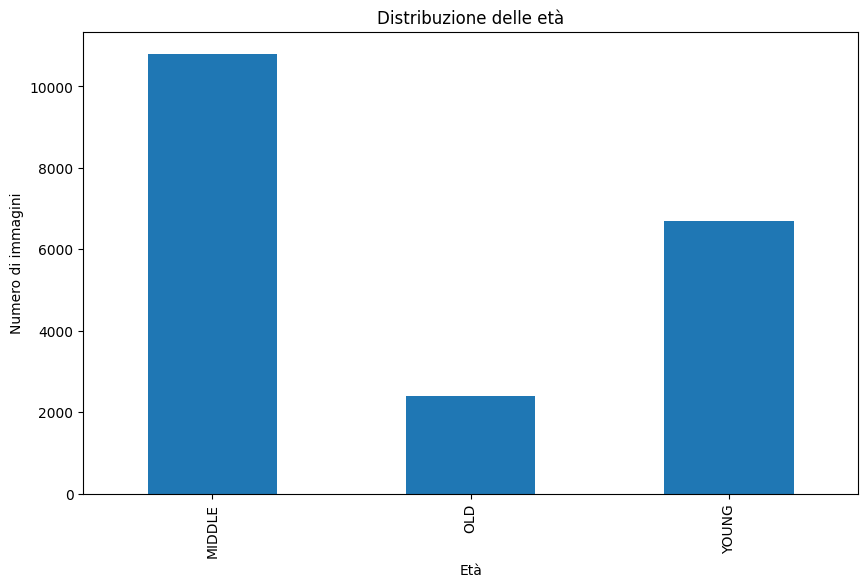

In [7]:
import matplotlib.pyplot as plt

# Distribuzione delle età
age_distribution = annotations['Class'].value_counts().sort_index()

# Plot distribuzione
plt.figure(figsize=(10, 6))
age_distribution.plot(kind='bar')
plt.title('Distribuzione delle età')
plt.xlabel('Età')
plt.ylabel('Numero di immagini')
plt.show()


In [8]:
from PIL import Image

# Controllo risoluzione immagini
low_res_images = []
for img_name in annotations['ID']:
    img_path = os.path.join(images_dir, img_name)
    with Image.open(img_path) as img:
        if img.size[0] < 100 or img.size[1] < 100:  # Soglia minima di risoluzione
            low_res_images.append(img_name)

print(f"Immagini a bassa risoluzione: {len(low_res_images)}")


Immagini a bassa risoluzione: 12706


In [9]:
from sklearn.model_selection import train_test_split

# Filtra il dataset per rimuovere le immagini di bassa qualità
high_quality_df = annotations[~annotations['ID'].isin(low_res_images)]

# Divisione stratificata in training e test
train_df, test_df = train_test_split(
    high_quality_df,
    test_size=0.2,
    stratify=high_quality_df['Class'],
    random_state=42
)

# Divisione stratificata del training set in training e validation
train_df, val_df = train_test_split(
    train_df,
    test_size=0.2,
    stratify=train_df['Class'],
    random_state=42
)

# Mostra la distribuzione dei set
print(f"Training set: {len(train_df)} immagini")
print(f"Validation set: {len(val_df)} immagini")
print(f"Test set: {len(test_df)} immagini")


Training set: 4608 immagini
Validation set: 1152 immagini
Test set: 1440 immagini


In [10]:
import os
import pandas as pd
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

# Dataset personalizzato
class AgeDataset(Dataset):
    def __init__(self, df, img_dir, transform=None):
        self.df = df
        self.img_dir = img_dir
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        img_path = os.path.join(self.img_dir, row['ID'])
        image = Image.open(img_path).convert('RGB')
        label = float(row['Class'])  # La classe è l'età
        if self.transform:
            image = self.transform(image)
        return image, label

# Trasformazioni per ResNet
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # ResNet richiede input 224x224
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalizzazione standard
])

# Creazione dei DataLoader
train_dataset = AgeDataset(train_df, '/content/dataset/faces/Train', transform)
val_dataset = AgeDataset(val_df, '/content/dataset/faces/Train', transform)
test_dataset = AgeDataset(test_df, '/content/dataset/faces/Train', transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [11]:
import torch
import torch.nn as nn
from torchvision.models import resnet50

# Carica ResNet-50 pre-addestrato
model = resnet50(pretrained=True)

# Congela i pesi dei livelli base
for param in model.parameters():
    param.requires_grad = False

# Sostituisci l'ultimo livello (per regressione)
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 1)  # 1 output per la regressione (età)

# Invia il modello alla GPU se disponibile
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:02<00:00, 38.5MB/s]


In [12]:
import torch.optim as optim

# Funzione di perdita e ottimizzatore
criterion = nn.MSELoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)  # Solo l'ultimo livello è addestrabile


In [13]:
class EarlyStopping:
    def __init__(self, patience=5, delta=0):
        self.patience = patience
        self.delta = delta
        self.counter = 0
        self.best_score = None
        self.early_stop = False

    def __call__(self, val_loss, model):
        score = -val_loss
        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(model)
            self.counter = 0

    def save_checkpoint(self, model):
        torch.save(model.state_dict(), 'checkpoint.pt')  # Salva il modello migliore


In [15]:
print(annotations['Class'].unique())


['MIDDLE' 'YOUNG' 'OLD']


In [16]:
# Mappa delle classi a valori numerici
age_mapping = {
    'YOUNG': 20,
    'MIDDLE': 40,
    'OLD': 60
}

# Applica la mappatura al dataset
annotations['Class'] = annotations['Class'].map(age_mapping)


In [17]:
print(annotations.head())
print(annotations['Class'].unique())


          ID  Class
0    377.jpg     40
1  17814.jpg     20
2  21283.jpg     40
3  16496.jpg     20
4   4487.jpg     40
[40 20 60]


In [19]:
# Verifica se ci sono ancora valori non numerici nella colonna 'Class'
print(annotations['Class'].unique())


[40 20 60]


In [20]:
annotations['Class'] = annotations['Class'].astype(float)


In [21]:
print(annotations['Class'].dtypes)
print(annotations['Class'].unique())


float64
[40. 20. 60.]


In [25]:
# Aggiorna i DataFrame dopo la conversione
train_df['Class'] = train_df['Class'].map(age_mapping)
val_df['Class'] = val_df['Class'].map(age_mapping)
test_df['Class'] = test_df['Class'].map(age_mapping)

# Verifica i valori unici
print(train_df['Class'].unique())
print(val_df['Class'].unique())
print(test_df['Class'].unique())


[40 20 60]
[40 20 60]
[60 40 20]


In [26]:
# Forza la conversione in float
train_df['Class'] = train_df['Class'].astype(float)
val_df['Class'] = val_df['Class'].astype(float)
test_df['Class'] = test_df['Class'].astype(float)


In [32]:
class AgeDataset(Dataset):
    def __init__(self, df, img_dir, transform=None):
        self.df = df
        self.img_dir = img_dir
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        img_path = os.path.join(self.img_dir, row['ID'])
        image = Image.open(img_path).convert('RGB')
        label = float(row['Class'])  # Converte esplicitamente
        if self.transform:
            image = self.transform(image)
        return image, torch.tensor(label, dtype=torch.float32)  # Forza il tipo a float32


In [33]:
# Ricrea i DataLoader con i DataFrame aggiornati
train_dataset = AgeDataset(train_df, '/content/dataset/faces/Train', transform)
val_dataset = AgeDataset(val_df, '/content/dataset/faces/Train', transform)
test_dataset = AgeDataset(test_df, '/content/dataset/faces/Train', transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)



In [35]:
# Testa il DataLoader per verificare i dati
for images, labels in train_loader:
    print(f"Batch di immagini: {images.shape}")
    print(f"Batch di etichette: {labels}")
    break


Batch di immagini: torch.Size([32, 3, 224, 224])
Batch di etichette: tensor([60., 20., 20., 40., 20., 60., 40., 40., 20., 40., 60., 20., 60., 60.,
        60., 20., 40., 40., 40., 40., 20., 20., 20., 20., 40., 20., 40., 40.,
        20., 40., 20., 40.])


In [40]:
import time
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from torchvision.models import resnet18
from torch.utils.data import DataLoader

# Configurazione dispositivo (CPU o GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Utilizzando dispositivo: {device}")

# Carica il modello pre-addestrato ResNet-18
model = resnet18(pretrained=True)

# Congela tutti i parametri del modello
for param in model.parameters():
    param.requires_grad = False

# Modifica l'ultimo strato per la regressione
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 1)  # Output a singolo valore (età)
model.fc.requires_grad = True  # Sblocca solo l'ultimo strato
model = model.to(device)

# Verifica i parametri del modello
print("Verifica dei parametri del modello:")
for name, param in model.named_parameters():
    print(f"{name}: requires_grad={param.requires_grad}")

# Ottimizzatore: aggiorna solo i parametri con requires_grad=True
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.001)

# Verifica i parametri che l'ottimizzatore aggiornerà
trainable_params = list(filter(lambda p: p.requires_grad, model.parameters()))
print(f"Numero di parametri addestrabili: {len(trainable_params)}")
assert len(trainable_params) > 0, "Errore: nessun parametro addestrabile!"

# Funzione di perdita (MSE per regressione)
criterion = nn.MSELoss()

# Trasformazioni per preprocessare le immagini
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # ResNet richiede immagini 224x224
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Normalizzazione standard
])

# Definizione dei DataLoader
# Supponendo che train_dataset e val_dataset siano già definiti
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False, num_workers=2)

# Funzione di training con verifiche
def train_model_optimized(model, train_loader, val_loader, criterion, optimizer, n_epochs=20, patience=5):
    early_stopping = EarlyStopping(patience=patience)
    train_losses, val_losses = [], []

    for epoch in range(n_epochs):
        start_epoch = time.time()

        # Training
        model.train()  # Imposta il modello in modalità training
        train_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device, dtype=torch.float32), labels.to(device, dtype=torch.float32)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs.squeeze(), labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * images.size(0)

        train_loss = train_loss / len(train_loader.dataset)
        train_losses.append(train_loss)

        # Validation
        model.eval()  # Imposta il modello in modalità evaluation
        val_loss = 0.0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device, dtype=torch.float32), labels.to(device, dtype=torch.float32)
                outputs = model(images)
                loss = criterion(outputs.squeeze(), labels)
                val_loss += loss.item() * images.size(0)

        val_loss = val_loss / len(val_loader.dataset)
        val_losses.append(val_loss)

        print(f"Epoch {epoch+1}/{n_epochs}, Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}, Time: {time.time() - start_epoch:.2f}s")

        # Early stopping
        early_stopping(val_loss, model)
        if early_stopping.early_stop:
            print("Early stopping")
            break

    # Carica il miglior modello
    model.load_state_dict(torch.load('checkpoint.pt'))
    return model, train_losses, val_losses

# Avvio del training
print("Inizio del training...")
model, train_losses, val_losses = train_model_optimized(model, train_loader, val_loader, criterion, optimizer, n_epochs=10, patience=3)
print("Training completato!")


Utilizzando dispositivo: cpu
Verifica dei parametri del modello:
conv1.weight: requires_grad=False
bn1.weight: requires_grad=False
bn1.bias: requires_grad=False
layer1.0.conv1.weight: requires_grad=False
layer1.0.bn1.weight: requires_grad=False
layer1.0.bn1.bias: requires_grad=False
layer1.0.conv2.weight: requires_grad=False
layer1.0.bn2.weight: requires_grad=False
layer1.0.bn2.bias: requires_grad=False
layer1.1.conv1.weight: requires_grad=False
layer1.1.bn1.weight: requires_grad=False
layer1.1.bn1.bias: requires_grad=False
layer1.1.conv2.weight: requires_grad=False
layer1.1.bn2.weight: requires_grad=False
layer1.1.bn2.bias: requires_grad=False
layer2.0.conv1.weight: requires_grad=False
layer2.0.bn1.weight: requires_grad=False
layer2.0.bn1.bias: requires_grad=False
layer2.0.conv2.weight: requires_grad=False
layer2.0.bn2.weight: requires_grad=False
layer2.0.bn2.bias: requires_grad=False
layer2.0.downsample.0.weight: requires_grad=False
layer2.0.downsample.1.weight: requires_grad=False
l

KeyboardInterrupt: 

In [ ]:
import time
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from torchvision.models import resnet18
from torch.utils.data import DataLoader

# Configurazione dispositivo (CPU o GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Utilizzando dispositivo: {device}")

# Carica il modello pre-addestrato ResNet-18
model = resnet18(pretrained=True)

# Congela tutti i parametri del modello
for param in model.parameters():
    param.requires_grad = False

# Modifica l'ultimo strato per la regressione
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 1)  # Output a singolo valore (età)
model.fc.requires_grad = True  # Sblocca solo l'ultimo strato
model = model.to(device)

# Verifica i parametri del modello
print("Verifica dei parametri del modello:")
for name, param in model.named_parameters():
    print(f"{name}: requires_grad={param.requires_grad}")

# Ottimizzatore: aggiorna solo i parametri con requires_grad=True
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.001)

# Verifica i parametri che l'ottimizzatore aggiornerà
trainable_params = list(filter(lambda p: p.requires_grad, model.parameters()))
print(f"Numero di parametri addestrabili: {len(trainable_params)}")
assert len(trainable_params) > 0, "Errore: nessun parametro addestrabile!"

# Funzione di perdita (MSE per regressione)
criterion = nn.MSELoss()

# Trasformazioni per preprocessare le immagini
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # ResNet richiede immagini 224x224
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Normalizzazione standard
])

# Definizione dei DataLoader
# Supponendo che train_dataset e val_dataset siano già definiti
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False, num_workers=2)

# Funzione di training con stima del tempo
def train_model_with_estimation(model, train_loader, val_loader, criterion, optimizer, n_epochs=20, patience=5):
    early_stopping = EarlyStopping(patience=patience)
    train_losses, val_losses = [], []

    # Calcolo del numero totale di batch
    num_train_batches = len(train_loader)
    num_val_batches = len(val_loader)

    # Variabili per il tempo
    total_batches = num_train_batches + num_val_batches
    time_per_batch = None  # Tempo medio per batch (sarà calcolato durante il primo epoch)

    for epoch in range(n_epochs):
        start_epoch = time.time()

        # Training
        model.train()
        train_loss = 0.0
        for i, (images, labels) in enumerate(train_loader):
            start_batch = time.time()

            images, labels = images.to(device, dtype=torch.float32), labels.to(device, dtype=torch.float32)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs.squeeze(), labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * images.size(0)

            # Calcola il tempo per batch e aggiorna la stima
            if time_per_batch is None:
                time_per_batch = time.time() - start_batch
            else:
                time_per_batch = 0.9 * time_per_batch + 0.1 * (time.time() - start_batch)

        train_loss = train_loss / len(train_loader.dataset)
        train_losses.append(train_loss)

        # Validation
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device, dtype=torch.float32), labels.to(device, dtype=torch.float32)
                outputs = model(images)
                loss = criterion(outputs.squeeze(), labels)
                val_loss += loss.item() * images.size(0)

        val_loss = val_loss / len(val_loader.dataset)
        val_losses.append(val_loss)

        epoch_time = time.time() - start_epoch
        remaining_epochs = n_epochs - (epoch + 1)
        estimated_time = remaining_epochs * total_batches * time_per_batch

        print(f"Epoch {epoch+1}/{n_epochs}, "
              f"Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}, "
              f"Epoch Time: {epoch_time:.2f}s, Estimated Remaining Time: {estimated_time / 60:.2f} minutes")

        # Early stopping
        early_stopping(val_loss, model)
        if early_stopping.early_stop:
            print("Early stopping")
            break

    # Carica il miglior modello
    model.load_state_dict(torch.load('checkpoint.pt'))
    return model, train_losses, val_losses

# Avvio del training
print("Inizio del training...")
model, train_losses, val_losses = train_model_with_estimation(model, train_loader, val_loader, criterion, optimizer, n_epochs=10, patience=3)
print("Training completato!")


Utilizzando dispositivo: cpu
Verifica dei parametri del modello:
conv1.weight: requires_grad=False
bn1.weight: requires_grad=False
bn1.bias: requires_grad=False
layer1.0.conv1.weight: requires_grad=False
layer1.0.bn1.weight: requires_grad=False
layer1.0.bn1.bias: requires_grad=False
layer1.0.conv2.weight: requires_grad=False
layer1.0.bn2.weight: requires_grad=False
layer1.0.bn2.bias: requires_grad=False
layer1.1.conv1.weight: requires_grad=False
layer1.1.bn1.weight: requires_grad=False
layer1.1.bn1.bias: requires_grad=False
layer1.1.conv2.weight: requires_grad=False
layer1.1.bn2.weight: requires_grad=False
layer1.1.bn2.bias: requires_grad=False
layer2.0.conv1.weight: requires_grad=False
layer2.0.bn1.weight: requires_grad=False
layer2.0.bn1.bias: requires_grad=False
layer2.0.conv2.weight: requires_grad=False
layer2.0.bn2.weight: requires_grad=False
layer2.0.bn2.bias: requires_grad=False
layer2.0.downsample.0.weight: requires_grad=False
layer2.0.downsample.1.weight: requires_grad=False
l